In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
import time
from datetime import datetime, timedelta
from sklearn import svm
import pandas as pd

import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
  
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,sentimentVector.rolling(5).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(10).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(15).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(20).mean()),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        1.0       5.0   
9          10  2017-08-14 16:00:00           0.0        1.0       5.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
def expercentage(y,prediction,percentage,t):
    tot=0
    falsetotpos=0
    falsetotneg=0
    for i in range(0,len(percentage)-1):
        if(prediction[i]==1):
            tot=tot+percentage[i]
        if(prediction[i]==0):
            tot=tot-percentage[i]
            
        falsetotpos=falsetotpos+percentage[i]
        falsetotneg=falsetotneg-percentage[i]
        i=i+t
    return tot,falsetotneg, falsetotpos

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5490716180371353
0.552212389380531
F1,score 0.635500365230095
G-score: 0.5196430353226328
Accuracy 0.5584070796460177
Window: 140
[[196 310]
 [189 435]]
Vol pos 3.0703448001942704
Vol neg 3.3053123310210095


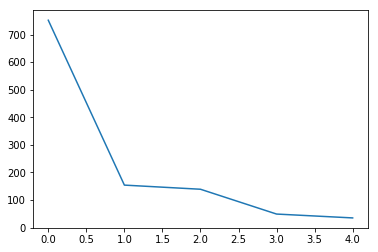

Real Percentage of gain: 87.45901594051999
Percentage of gain: 0.2548997484452221
Total gain: 288.036715743101
000000000000000000000000000000000000000000000000
Percentile:  0
[[150 228]
 [ 98 277]]
0.5670650730411687
Percentile:  1
[[25 43]
 [26 58]]
0.5460526315789473
Percentile:  2
[[21 39]
 [24 55]]
0.5467625899280576
Percentile:  3
[[ 0  0]
 [33 16]]
0.32653061224489793
Percentile:  4
[[ 0  0]
 [ 8 27]]
0.7714285714285715
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.6817579505300353
0.7782685512367491
F1,score 0.6328600405679513
G-score: 0.506046932622867
Accuracy 0.5203180212014135
Window: 140
[[121 130]
 [413 468]]
Vol pos 2.170027963190798
Vol neg 2.5721993345865695


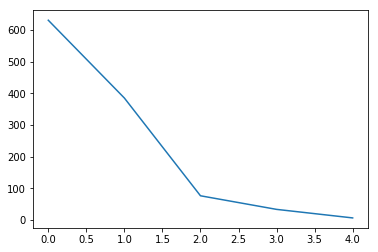

Real Percentage of gain: 57.38209189506739
Percentage of gain: -0.10473301091972374
Total gain: -118.55776836112726
000000000000000000000000000000000000000000000000
Percentile:  0
[[116  83]
 [211 220]]
0.5333333333333333
Percentile:  1
[[  3  33]
 [147 202]]
0.5324675324675324
Percentile:  2
[[ 2 14]
 [16 44]]
0.6052631578947368
Percentile:  3
[[ 0  0]
 [32  1]]
0.030303030303030304
Percentile:  4
[[0 0]
 [6 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.3288564850345357
0.8602150537634409
F1,score 0.870632672332389
G-score: 0.6924265116944406
Accuracy 0.7895545314900153
Window: 140
[[ 53  38]
 [ 99 461]]
Vol pos 2.236029395456118
Vol neg 1.5059326511412359


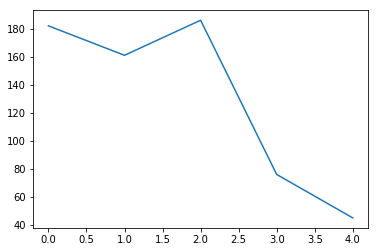

Real Percentage of gain: 112.98478213083995
Percentage of gain: 1.448550439413357
Total gain: 943.0063360580953
000000000000000000000000000000000000000000000000
Percentile:  0
[[34 38]
 [22 88]]
0.6703296703296703
Percentile:  1
[[ 19   0]
 [ 28 114]]
0.8260869565217391
Percentile:  2
[[  0   0]
 [ 43 143]]
0.7688172043010753
Percentile:  3
[[ 0  0]
 [ 6 70]]
0.9210526315789473
Percentile:  4
[[45]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6279840848806366
0.5973451327433629
F1,score 0.507177033492823
G-score: 0.44818450761862894
Accuracy 0.45309734513274336
Window: 140
[[194 261]
 [357 318]]
Vol pos 2.749058029815026
Vol neg 3.1261530359436005


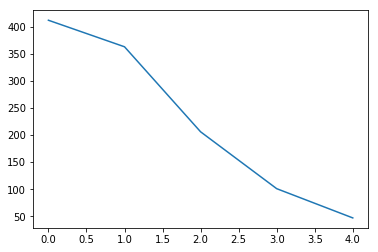

Real Percentage of gain: -39.308573033821666
Percentage of gain: -0.4641104999538511
Total gain: -524.4448649478518
000000000000000000000000000000000000000000000000
Percentile:  0
[[100 132]
 [ 73 106]]
0.5012165450121655
Percentile:  1
[[ 44  67]
 [123 129]]
0.4765840220385675
Percentile:  2
[[48 49]
 [84 25]]
0.35436893203883496
Percentile:  3
[[ 1 13]
 [60 27]]
0.27722772277227725
Percentile:  4
[[ 0  0]
 [16 31]]
0.6595744680851063
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6778686712359053
0.6292035398230088
F1,score 0.5451784358390281
G-score: 0.45527063156101066
Accuracy 0.46991150442477875
Window: 140
[[172 247]
 [352 359]]
Vol pos 1.3020904253509165
Vol neg 1.8171359559945224


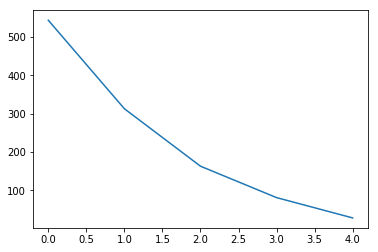

Real Percentage of gain: 13.986900336342599
Percentage of gain: -0.35137559449502853
Total gain: -397.0544217793822
000000000000000000000000000000000000000000000000
Percentile:  0
[[129 163]
 [ 73 179]]
0.5661764705882353
Percentile:  1
[[ 29  45]
 [125 114]]
0.45686900958466453
Percentile:  2
[[ 7 16]
 [96 44]]
0.3128834355828221
Percentile:  3
[[ 4 16]
 [47 14]]
0.2222222222222222
Percentile:  4
[[ 3  7]
 [11  7]]
0.35714285714285715
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5687789799072643
0.7676678445229682
F1,score 0.6447638603696098
G-score: 0.5409621298231221
Accuracy 0.5415194346289752
Window: 140
[[142 121]
 [398 471]]
Vol pos 3.0773987646487906
Vol neg 3.0779898975900095


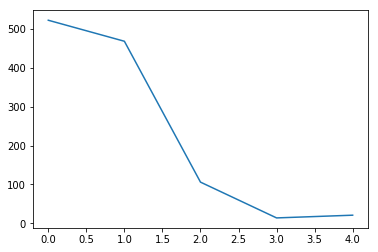

Real Percentage of gain: 39.53854584170536
Percentage of gain: 0.2552726907071499
Total gain: 288.9686858804937
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 97 115]
 [143 167]]
0.5057471264367817
Percentile:  1
[[ 31   6]
 [178 253]]
0.6068376068376068
Percentile:  2
[[13  0]
 [58 34]]
0.44761904761904764
Percentile:  3
[[0 0]
 [9 5]]
0.35714285714285715
Percentile:  4
[[ 0  0]
 [ 9 12]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.592183705012144
0.6042402826855123
F1,score 0.5942962281508739
G-score: 0.6228136361680157
Accuracy 0.6104240282685512
Window: 140
[[368  80]
 [361 323]]
Vol pos 2.533579902896346
Vol neg 2.011980586104559


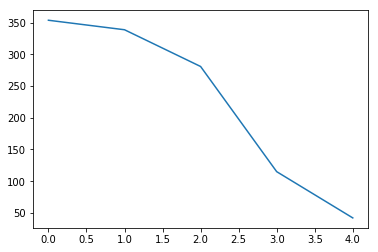

Real Percentage of gain: 103.8290988560869
Percentage of gain: 0.7627387583297391
Total gain: 863.4202744292647
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 92  24]
 [148  90]]
0.5141242937853108
Percentile:  1
[[ 94  20]
 [114 114]]
0.6081871345029239
Percentile:  2
[[101  26]
 [ 68  83]]
0.6618705035971223
Percentile:  3
[[58  5]
 [26 25]]
0.7280701754385965
Percentile:  4
[[23  5]
 [ 4 10]]
0.7857142857142857
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6754775655264327
0.576
F1,score 0.4221105527638191
G-score: 0.4806206355919213
Accuracy 0.4888888888888889
Window: 140
[[340 137]
 [438 210]]
Vol pos 2.075231008683682
Vol neg 1.6181547154692493


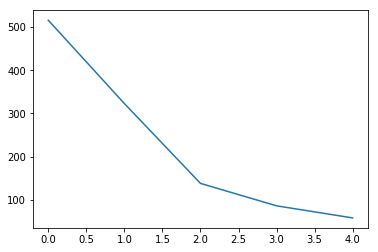

Real Percentage of gain: 43.44128002011812
Percentage of gain: 0.18750052744996154
Total gain: 210.93809338120673
000000000000000000000000000000000000000000000000
Percentile:  0
[[169  51]
 [221  75]]
0.4728682170542636
Percentile:  1
[[ 61  35]
 [143  84]]
0.44891640866873067
Percentile:  2
[[12 38]
 [56 32]]
0.3188405797101449
Percentile:  3
[[45 13]
 [ 9 19]]
0.7441860465116279
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.45605123674911663
0.5229681978798587
F1,score 0.49626865671641796
G-score: 0.5208250750096032
Accuracy 0.5229681978798587
Window: 140
[[326 214]
 [326 266]]
Vol pos 2.897610995601194
Vol neg 2.8123637459647743


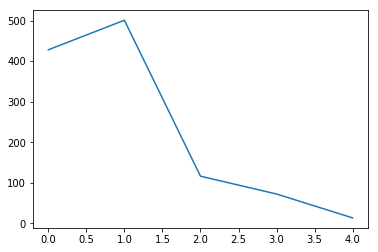

Real Percentage of gain: 29.18284673282527
Percentage of gain: 0.17377145457149196
Total gain: 196.7092865749289
000000000000000000000000000000000000000000000000
Percentile:  0
[[130  97]
 [ 80 121]]
0.5864485981308412
Percentile:  1
[[111  86]
 [198 106]]
0.43313373253493015
Percentile:  2
[[35  7]
 [40 34]]
0.5948275862068966
Percentile:  3
[[36 24]
 [ 8  4]]
0.5555555555555556
Percentile:  4
[[13]]
1.0
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.6489291234268051
0.5795053003533569
F1,score 0.7157894736842105
G-score: 0.6509842454352317
Accuracy 0.666077738515901
Window: 140
[[278 198]
 [180 476]]
Vol pos 3.7710981646538992
Vol neg 3.767096015232769


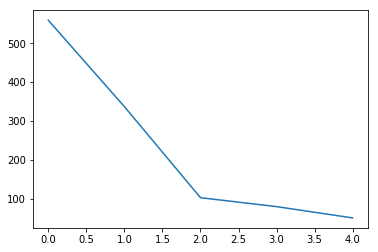

Real Percentage of gain: 410.27864876570015
Percentage of gain: 1.2539273165998706
Total gain: 1419.4457223910536
000000000000000000000000000000000000000000000000
Percentile:  0
[[201 112]
 [ 73 173]]
0.669051878354204
Percentile:  1
[[ 67  50]
 [ 62 158]]
0.6676557863501483
Percentile:  2
[[10 21]
 [ 7 65]]
0.7281553398058253
Percentile:  3
[[ 0 15]
 [19 46]]
0.575
Percentile:  4
[[ 0  0]
 [19 32]]
0.6274509803921569
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6528268551236749
0.7376325088339223
F1,score 0.6975512905360689
G-score: 0.5608086490538874
Accuracy 0.5962897526501767
Window: 140
[[148 149]
 [308 527]]
Vol pos 4.450442524656533
Vol neg 4.1686144193046175


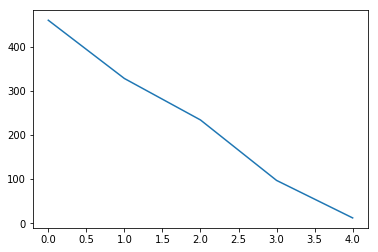

Real Percentage of gain: 165.16617436223441
Percentage of gain: 0.9708409138877645
Total gain: 1098.9919145209494
000000000000000000000000000000000000000000000000
Percentile:  0
[[101  69]
 [ 88 202]]
0.658695652173913
Percentile:  1
[[  9  51]
 [127 141]]
0.4573170731707317
Percentile:  2
[[ 11  27]
 [ 80 115]]
0.5407725321888412
Percentile:  3
[[25  2]
 [13 57]]
0.845360824742268
Percentile:  4
[[ 1  0]
 [ 0 11]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5771643663739021
0.6708542713567839
F1,score 0.6745762711864407
G-score: 0.1995649555511141
Accuracy 0.5175879396984925
Window: 140
[[  7 124]
 [ 68 199]]
Vol pos 1.3855781042346027
Vol neg 0.9615198545768151


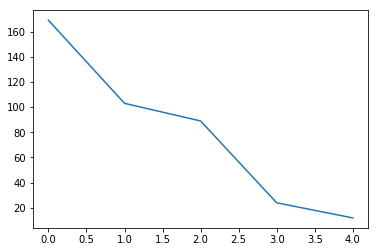

Real Percentage of gain: 129.95803862538722
Percentage of gain: 0.25330974219492375
Total gain: 100.81727739357964
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 6 91]
 [32 43]]
0.28488372093023256
Percentile:  1
[[ 0 26]
 [ 2 72]]
0.72
Percentile:  2
[[ 0  7]
 [15 67]]
0.7528089887640449
Percentile:  3
[[ 0  0]
 [ 8 15]]
0.6521739130434783
Percentile:  4
[[ 0  0]
 [10  2]]
0.16666666666666666
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.716024789729969
0.6563330380868024
F1,score 0.2589285714285714
G-score: 0.2786887224798536
Accuracy 0.26483613817537643
Window: 140
[[154 234]
 [596 145]]
Vol pos 1.6111866957106025
Vol neg 2.960830385198994


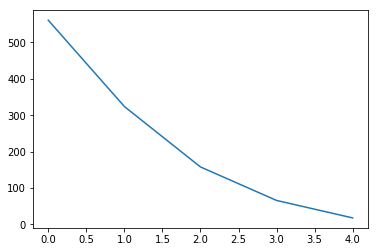

Real Percentage of gain: -280.776706422183
Percentage of gain: -1.7499950378190392
Total gain: -1975.7443976976951
000000000000000000000000000000000000000000000000
Percentile:  0
[[135 142]
 [207  77]]
0.3778966131907308
Percentile:  1
[[ 19  44]
 [214  47]]
0.2037037037037037
Percentile:  2
[[  0  25]
 [112  21]]
0.13291139240506328
Percentile:  3
[[ 0 23]
 [43  0]]
0.0
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5342526690391459
0.7150489759572574
F1,score 0.7223719676549866
G-score: 0.6041832171621234
Accuracy 0.6331255565449688
Window: 140
[[175 145]
 [267 536]]
Vol pos 2.0960817712112383
Vol neg 1.6467852335937379


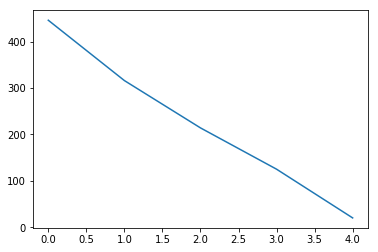

Real Percentage of gain: 199.9911924095438
Percentage of gain: 0.7229195218972133
Total gain: 811.8386230905705
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 73  92]
 [110 171]]
0.547085201793722
Percentile:  1
[[ 31  24]
 [ 87 174]]
0.6487341772151899
Percentile:  2
[[ 19   7]
 [ 46 142]]
0.7523364485981309
Percentile:  3
[[38 18]
 [23 46]]
0.672
Percentile:  4
[[13  4]
 [ 1  2]]
0.75
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6905918727915195
0.6746242263483643
F1,score 0.6839309428950862
G-score: 0.506735644259552
Accuracy 0.579133510167993
Window: 140
[[140 228]
 [248 515]]
Vol pos 2.6860741618553163
Vol neg 2.2340784179537283


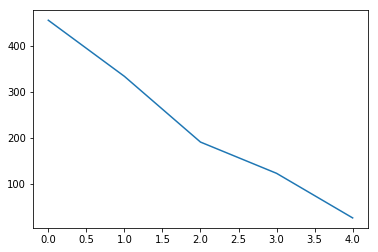

Real Percentage of gain: 76.40252632607694
Percentage of gain: 0.6153468161531898
Total gain: 695.9572490692576
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 80 128]
 [ 84 163]]
0.5340659340659341
Percentile:  1
[[ 60  69]
 [ 79 126]]
0.5568862275449101
Percentile:  2
[[  0  14]
 [ 64 114]]
0.59375
Percentile:  3
[[ 0 10]
 [21 91]]
0.7459016393442623
Percentile:  4
[[ 0  7]
 [ 0 19]]
0.7307692307692307
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.5048802129547472
0.639751552795031
F1,score 0.4818694601128122
G-score: 0.43470117011771287
Accuracy 0.42945874001774625
Window: 140
[[185 221]
 [422 299]]
Vol pos 3.8772782180135286
Vol neg 2.6935777358090403


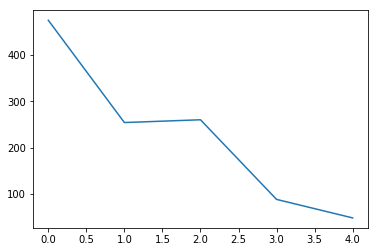

Real Percentage of gain: -13.642857716880313
Percentage of gain: 0.12833378295770634
Total gain: 144.63217339333505
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76 125]
 [199  75]]
0.3178947368421053
Percentile:  1
[[32 72]
 [74 76]]
0.4251968503937008
Percentile:  2
[[ 23  15]
 [111 111]]
0.5153846153846153
Percentile:  3
[[20  5]
 [38 25]]
0.5113636363636364
Percentile:  4
[[33  4]
 [ 0 11]]
0.9166666666666666
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.7039823008849557
0.7183348095659876
F1,score 0.5478073328540618
G-score: 0.41928756394632183
Accuracy 0.4428697962798937
Window: 140
[[119 199]
 [430 381]]
Vol pos 2.5324134354318253
Vol neg 3.209955411241972


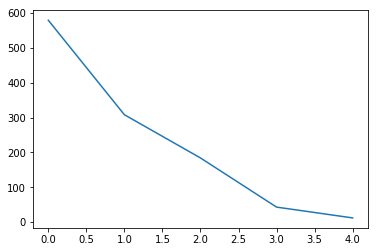

Real Percentage of gain: -66.03859037462402
Percentage of gain: -0.6668336899515392
Total gain: -752.8552359552878
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 56  78]
 [219 226]]
0.48704663212435234
Percentile:  1
[[ 18  33]
 [131 126]]
0.4675324675324675
Percentile:  2
[[41 79]
 [47 17]]
0.31521739130434784
Percentile:  3
[[ 4  9]
 [25  5]]
0.20930232558139536
Percentile:  4
[[0 0]
 [7 5]]
0.4166666666666667
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.4787422497785651
0.48404255319148937
F1,score 0.5248618784530387
G-score: 0.5415499158134441
Accuracy 0.5425531914893617
Window: 140
[[327 255]
 [261 285]]
Vol pos 3.0664782117181755
Vol neg 3.4433419140434873


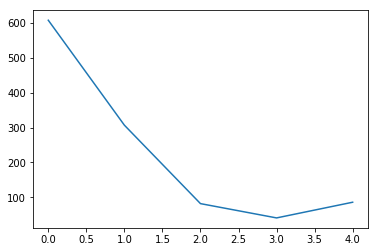

Real Percentage of gain: -17.939778565345136
Percentage of gain: 0.08858177121018079
Total gain: 99.92023792508394
000000000000000000000000000000000000000000000000
Percentile:  0
[[242  97]
 [165 104]]
0.569078947368421
Percentile:  1
[[ 24  79]
 [ 72 132]]
0.50814332247557
Percentile:  2
[[ 3  9]
 [23 47]]
0.6097560975609756
Percentile:  3
[[21 20]
 [ 0  0]]
0.5121951219512195
Percentile:  4
[[37 49]
 [ 0  0]]
0.43023255813953487
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6553559547571524
0.6583850931677019
F1,score 0.5742857142857143
G-score: 0.4260647102568876
Accuracy 0.47116237799467614
Window: 140
[[129 256]
 [340 402]]
Vol pos 1.4709653776760734
Vol neg 1.3135622546470938


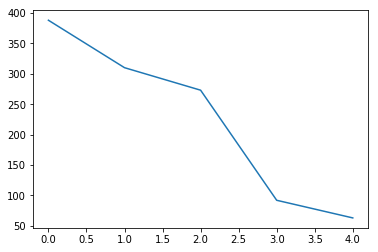

Real Percentage of gain: -10.053382684015679
Percentage of gain: -0.0015975938098251239
Total gain: -1.8004882236729145
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 64 136]
 [ 87 100]]
0.42377260981912146
Percentile:  1
[[ 36  68]
 [ 97 109]]
0.46774193548387094
Percentile:  2
[[ 28  40]
 [ 97 108]]
0.4981684981684982
Percentile:  3
[[ 0 12]
 [31 49]]
0.532608695652174
Percentile:  4
[[ 0  0]
 [27 36]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47791519434628976
0.6861184792219275
F1,score 0.5012244897959183
G-score: 0.4872074855958379
Accuracy 0.45977011494252873
Window: 140
[[213 142]
 [469 307]]
Vol pos 3.505681746268946
Vol neg 3.2207934822311435


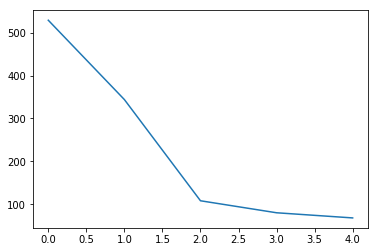

Real Percentage of gain: -4.272262334536755
Percentage of gain: -0.12816119326558514
Total gain: -144.9503095833768
000000000000000000000000000000000000000000000000
Percentile:  0
[[134  96]
 [155 144]]
0.5255198487712666
Percentile:  1
[[ 19  29]
 [217  79]]
0.28488372093023256
Percentile:  2
[[18  0]
 [60 30]]
0.4444444444444444
Percentile:  3
[[11  1]
 [23 45]]
0.7
Percentile:  4
[[31 15]
 [13  9]]
0.5882352941176471
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5278976944019179
Mean gain over portfolio :  162.36375516512626
Real mean gain over portfolio 51.87844955555207


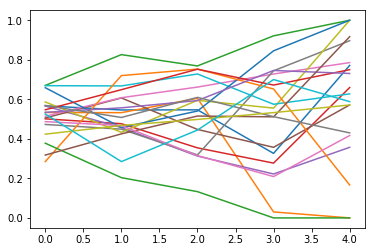

In [3]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(senttemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    senttemp=scaler.transform(senttemp)
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

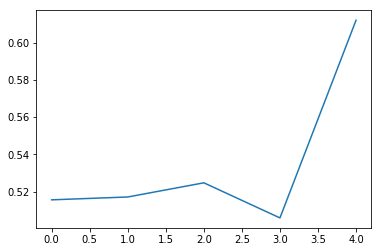

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [ ]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(senttemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    senttemp=scaler.transform(senttemp)
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [ ]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(senttemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    senttemp=scaler.transform(senttemp)
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [ ]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(senttemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    senttemp=scaler.transform(senttemp)
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        yprice=[]
        yvolatility=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(senttemp[i])
        y=np.array(y)
        
        x=np.array(x)
        percentage=np.array(percentage)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        yvolatility=np.array(yvolatility)
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

In [ ]:
tempacc=aucresults

In [ ]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    #for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
        #if(tempacc[i][k]<0.5):
           #tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()

In [ ]:
meanvalue=[]
for i in range(0,len(tempacc)):
    meanvalue.append(np.mean(tempacc[i]))
top10=np.argsort(meanvalue)[-15:]
for i in range(0,len(top10)):
    print(files[top10[i]])
    #print(tempacc[top10[i]])
    print(meanvalue[top10[i]])
    plt.plot(prices[top10[i]].iloc[3600:]['close'])
    plt.show()

In [ ]:
tempacc=f1stocksresults

In [ ]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
        if(tempacc[i][k]<0.5):
           tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()